# Image Compression using K-means Clustering
This code uses K-means algorithm to compress an image by reducing the number of colors that occur in the image to only the most common colors in that image.

The number of colors can be selected as an input.

In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Model

In [3]:
def find_closest_centroids(X, centroids):
    """
    Returns the closest centroid for each data point
    
    Args: 
      X (ndarray): (m, n) Input values      
      centroids (ndarray): (K, n) centroids
    
    Returns:  
      idx (array_like): (m,) closest centroids
    
    """

    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    # for each input find the distance to each centroid
    # find the index with the minimum distance
    for i in range(idx.shape[0]):
        
        distance = []
        for j in range(K):
            norm_ij = np.linalg.norm([X[i]-centroids[j]])
            distance.append(norm_ij)
            
        idx[i] = np.argmin(distance)

    return idx

In [4]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the mean of the 
    data points in the centroids cluster.
    
    Args:
      X (ndarray):   (m, n) Data points
      idx (ndarray): (m,) Array containing index of closest centroid for each 
                      data point in X. 
      K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) Newly computed centroids 
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)
    
    return centroids

In [5]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
  
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    
    return centroids

In [6]:
def kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids   
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each data point in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
            
        # Compute new centroids
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

## Uploading Input

In [7]:
# Upload image
from google.colab import files
uploaded = files.upload()

Saving sparrow.jpeg to sparrow.jpeg


In [10]:
# Load an image of a bird
original_img = plt.imread(str(list(uploaded.keys())[0]))

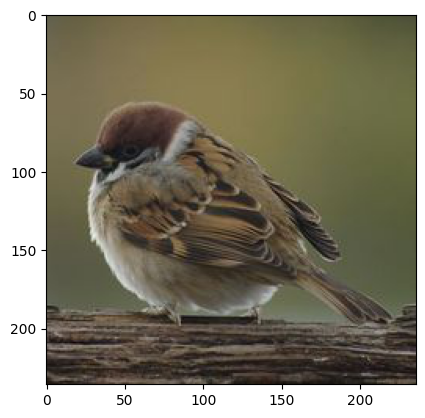

In [11]:
# Visualizing the image
plt.imshow(original_img)

In [12]:
# Checking dimensions of the image
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (236, 236, 3)


## Preprocessing

In [13]:
# Reshape the image into an m x 3 matrix where m = number of pixels
# Each row will contain the Red, Green and Blue pixel values

X = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

## Running K-Means on image pixels

In [14]:
K = 16
max_iters = 10

# Random initialization
initial_centroids = kMeans_init_centroids(X, K)

# Running K-Means
centroids, idx = kMeans(X, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [15]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first ten elements:", idx[:10])

Shape of idx: (55696,)
Closest centroid for the first ten elements: [2 2 2 2 2 2 2 2 2 4]


## Image Compression

In [16]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X, centroids)

# Replace each pixel with the color of the closest centroid
if np.max(centroids) > 1:
  X_recovered = centroids[idx, :]/255.0   # for non PNG type files
else:
  X_recovered = centroids[idx, :]   # for PNG files

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

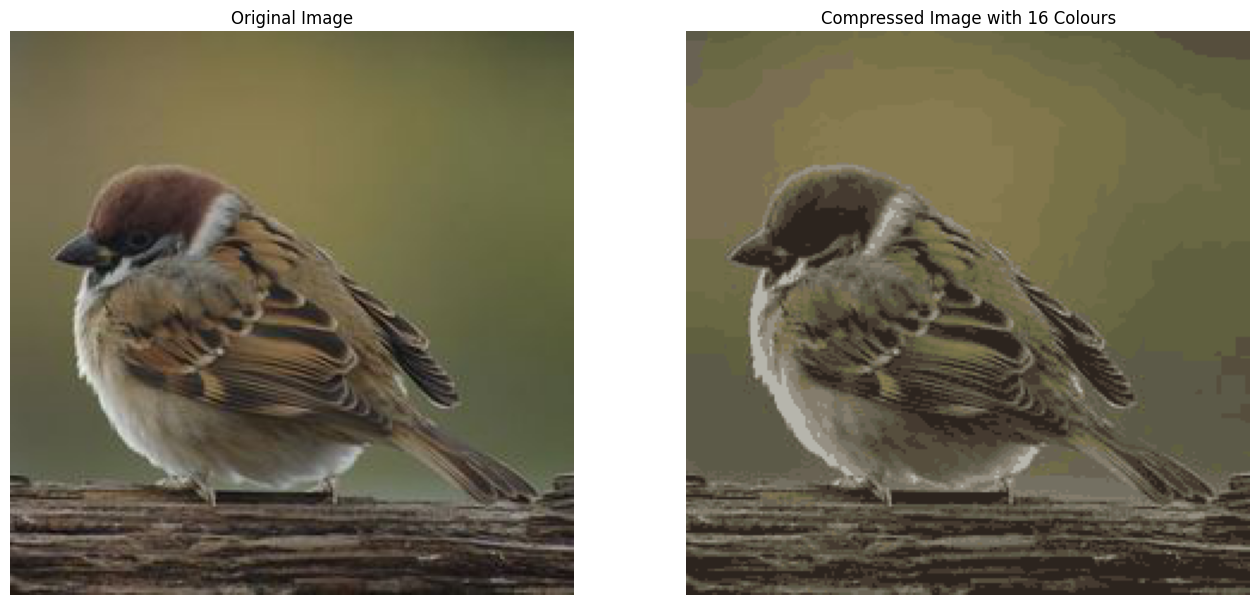

In [17]:
fig, ax = plt.subplots(1,2, figsize=(16,16))

# Display original image
ax[0].imshow(original_img)
ax[0].set_title('Original Image')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title(f'Compressed Image with {K} Colours')
ax[1].set_axis_off()